In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
#!pip install category-encoders

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from IPython.display import HTML
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go 
from pandas.plotting import scatter_matrix
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 
from sklearn.model_selection import train_test_split
import xgboost as xgb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [ ]:
#Reading the csv file
hotel_data = pd.read_csv('/content/hotel_bookings.csv', header='infer')

In [ ]:
#Data Preview
hotel_data.head()

hotel  is_canceled  ...  reservation_status  reservation_status_date
0  Resort Hotel            0  ...           Check-Out               2015-07-01
1  Resort Hotel            0  ...           Check-Out               2015-07-01
2  Resort Hotel            0  ...           Check-Out               2015-07-02
3  Resort Hotel            0  ...           Check-Out               2015-07-02
4  Resort Hotel            0  ...           Check-Out               2015-07-03

[5 rows x 32 columns]

In [ ]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_data.describe()

is_canceled  ...  total_of_special_requests
count  119390.000000  ...              119390.000000
mean        0.370416  ...                   0.571363
std         0.482918  ...                   0.792798
min         0.000000  ...                   0.000000
25%         0.000000  ...                   0.000000
50%         0.000000  ...                   0.000000
75%         1.000000  ...                   1.000000
max         1.000000  ...                   5.000000

[8 rows x 20 columns]

In [ ]:
profile = ProfileReport(hotel_data)
profile.to_notebook_iframe()
profile.to_file(output_file="hotel.html")

In [ ]:
#DUplicate Rows
duplicate = hotel_data[hotel_data.duplicated()]  
print("Duplicate Rows :")
print(duplicate)

Duplicate Rows :
               hotel  is_canceled  ...  reservation_status  reservation_status_date
5       Resort Hotel            0  ...           Check-Out               2015-07-03
22      Resort Hotel            0  ...           Check-Out               2015-07-07
43      Resort Hotel            0  ...           Check-Out               2015-07-07
138     Resort Hotel            1  ...            Canceled               2015-07-01
200     Resort Hotel            0  ...           Check-Out               2015-07-08
...              ...          ...  ...                 ...                      ...
119349    City Hotel            0  ...           Check-Out               2017-09-03
119352    City Hotel            0  ...           Check-Out               2017-09-03
119353    City Hotel            0  ...           Check-Out               2017-09-03
119354    City Hotel            0  ...           Check-Out               2017-09-03
119373    City Hotel            0  ...           Check-Out 

In [ ]:
#Deleting Duplicate Rows
hotel_data.drop_duplicates(keep='last', inplace=True)

In [ ]:
hotel_data

hotel  is_canceled  ...  reservation_status  reservation_status_date
0       Resort Hotel            0  ...           Check-Out               2015-07-01
1       Resort Hotel            0  ...           Check-Out               2015-07-01
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
5       Resort Hotel            0  ...           Check-Out               2015-07-03
...              ...          ...  ...                 ...                      ...
119385    City Hotel            0  ...           Check-Out               2017-09-06
119386    City Hotel            0  ...           Check-Out               2017-09-07
119387    City Hotel            0  ...           Check-Out               2017-09-07
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...           Check-Out               2017-09-07

[87396 rows x 32 columns]

In [ ]:
#Country Dataframe consist total guest from respective countries who didn't canceled their bookings
country = pd.DataFrame(hotel_data.loc[hotel_data["is_canceled"] == 0]["country"].value_counts())

In [ ]:
#Renaming the country column as Number of guests
country.rename(columns={"country": "Number of Guests"}, inplace=True)

In [ ]:
#Country wise Guest
total_guests = country["Number of Guests"].sum()
country["Guests in percentage"] = round(country["Number of Guests"] / total_guests * 100, 2)
country["country_"] = country.index
country

Number of Guests  Guests in percentage country_
PRT             17662                 28.06      PRT
GBR              8448                 13.42      GBR
FRA              7104                 11.28      FRA
ESP              5390                  8.56      ESP
DEU              4334                  6.88      DEU
..                ...                   ...      ...
PLW                 1                  0.00      PLW
DJI                 1                  0.00      DJI
BWA                 1                  0.00      BWA
MAC                 1                  0.00      MAC
LCA                 1                  0.00      LCA

[165 rows x 3 columns]

In [ ]:
#Pie Chart of Nationality of Guests
fig = px.pie(country,
             values="Number of Guests",
             names="country_",
             title="Nationality of Guests")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()
HTML(fig.to_html())

In [ ]:
#Geo Map shows the heatmap of number of guest coming from respective countries
geo_map = px.choropleth(country,
                       locations = country.index,
                       title="Nationality of guesta")
geo_map.show()
HTML(geo_map.to_html())

Text(0.5, 1.0, 'Hotel Type')

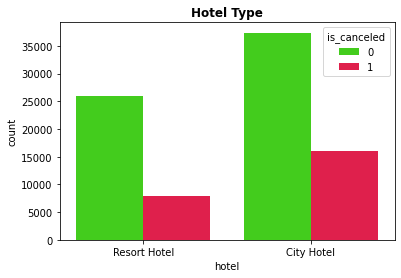

In [ ]:
#Hotel Type Plot
sns.countplot(x='hotel',hue='is_canceled',data = hotel_data,palette='prism')
plt.title('Hotel Type',weight='bold')

#Majority of the hotel was a city hotel and most people booked it as resort hotel were expensive and more 
#appropriate for large number of people and explains why city hotels have more number of cancellations

Text(0.5, 1.0, 'Booking canceled')

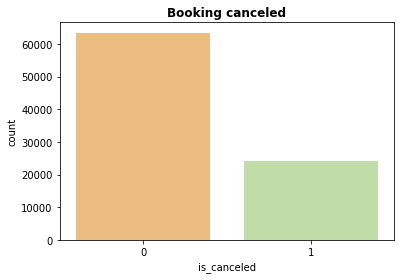

In [ ]:
#Booking Canceled Plot
sns.countplot(x='is_canceled',data = hotel_data,palette='Spectral')
plt.title('Booking canceled',weight='bold')

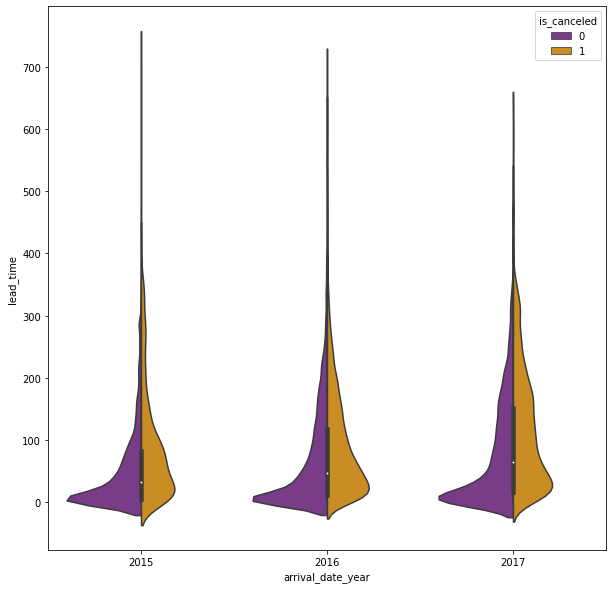

In [ ]:
#Year vs Lead Time plot
plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=hotel_data, palette="CMRmap",split=True)

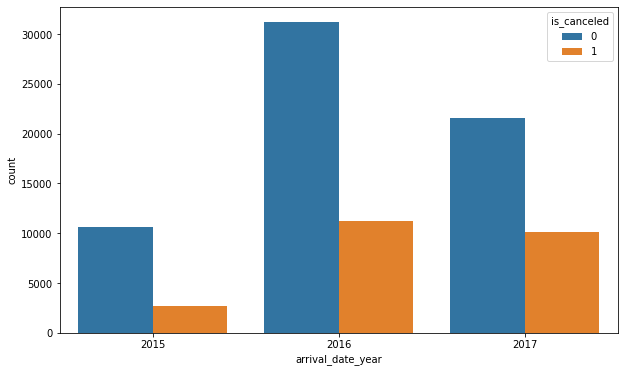

In [ ]:
#Cancelations over the years plot
plt.figure(figsize=(10,6))
sns.countplot(x='arrival_date_year',data=hotel_data,hue='is_canceled')

#Year Plot suggest that 2016 was most productive year in terms of booking

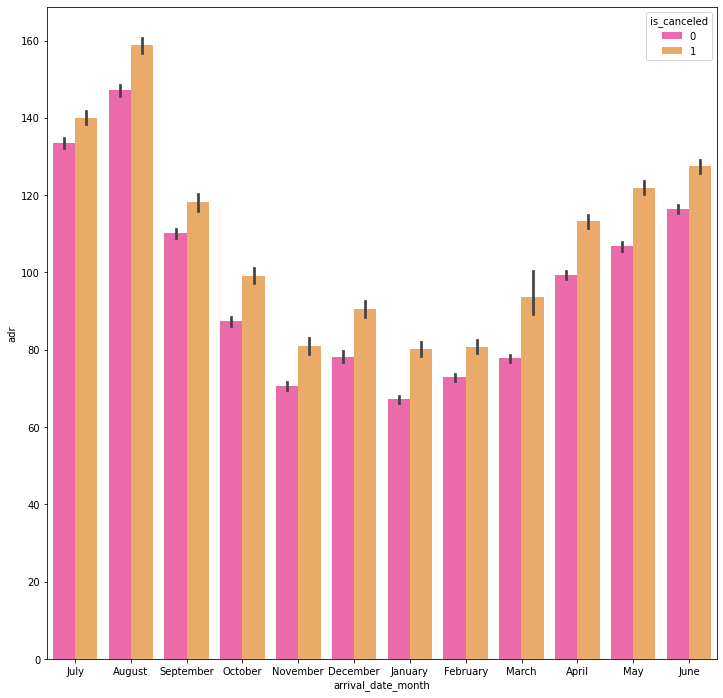

In [ ]:
#Plot of cancelations over the months
plt.figure(figsize=(12,12))
sns.barplot(x='arrival_date_month', y='adr', hue='is_canceled', palette= 'spring', data=hotel_data)

#Month Plot suggest that July and August has highest number of boookings. July August comes under the summer
#vacation month so number of bookings are high.

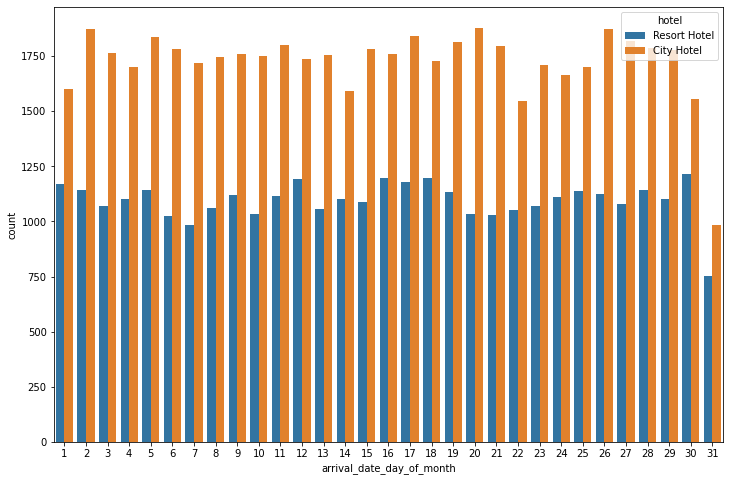

In [ ]:
#Plot of bookingf of City Hotel and Resort Hotel across the day of month
plt.figure(figsize=(12,8))
sns.countplot(x='arrival_date_day_of_month',data=hotel_data,hue='hotel')


#Hotel Booking is high for particular intervals, asssuming those will be the weekends. We will obserrve those in
#our next plots

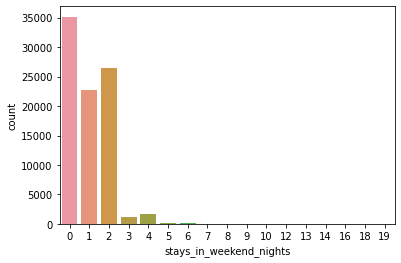

In [ ]:
#Frequency of stay during weekday nights
sns.countplot(x='stays_in_weekend_nights',data=hotel_data)

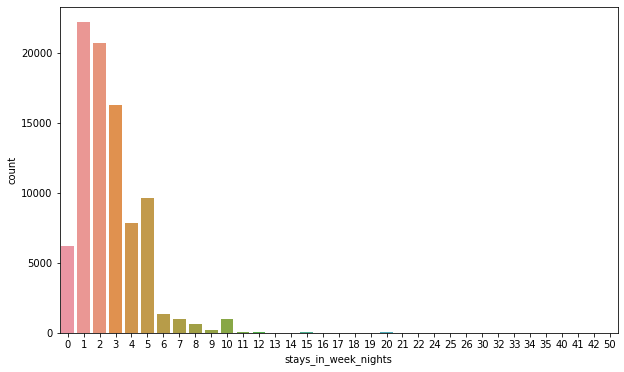

In [ ]:
#Frequency of stay during the weekends 
plt.figure(figsize=(10,6))
sns.countplot(x='stays_in_week_nights',data=hotel_data)

# From these two graph it is clear that the stay over weekday is more in number than the number of people stay duing the weekend nights

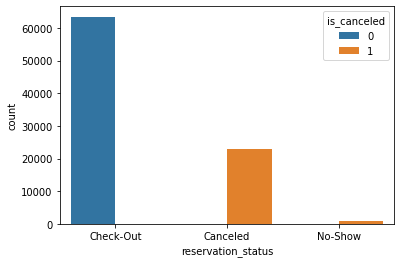

In [ ]:
#Frequency of reservation_status
sns.countplot(x='reservation_status',data=hotel_data,hue='is_canceled')

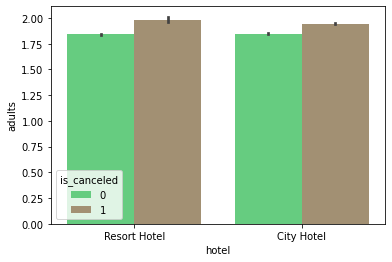

In [ ]:
#Plots of adults bookings (canceled/not canceled) vs hotels
sns.barplot(x='hotel',y='adults',data=hotel_data,hue='is_canceled',palette='terrain')

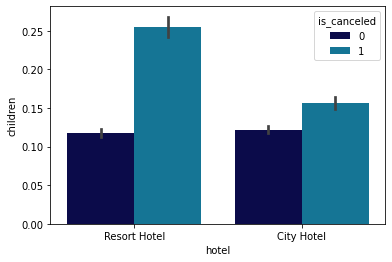

In [ ]:
#Plots of children bookings (canceled/not canceled) vs hotels
sns.barplot(x='hotel',y='children',data=hotel_data,hue='is_canceled',palette='ocean')

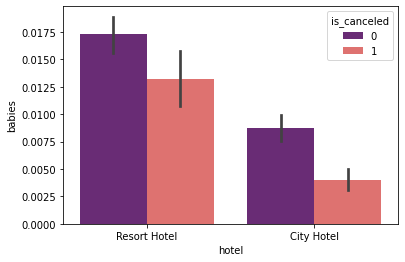

In [ ]:
#Plots of babies bookings (canceled/not canceled) vs hotels
sns.barplot(x='hotel',y='babies',data=hotel_data,hue='is_canceled',palette='magma')

#People with babies prefer the resort hotel 

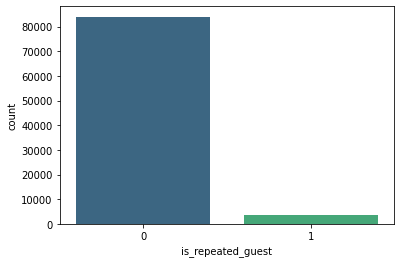

In [ ]:
#Frquency of repeated guests 
sns.countplot(x='is_repeated_guest',data=hotel_data,palette='viridis')
#Repeated guests number are very low so special attention must be given here as they have experienced the hotel facilities and these guests will help to recommend other for hotel.

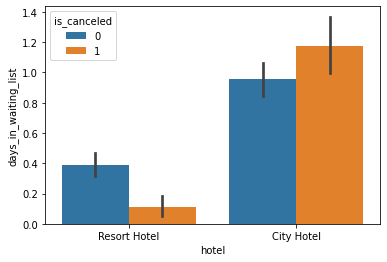

In [ ]:
sns.barplot(x='hotel',y='days_in_waiting_list',data=hotel_data,hue='is_canceled')

#From below graph we can say that with the increase in number of days in waiting list will lead to cancelation of City hotel and it is vice versa in Resort Hotel.

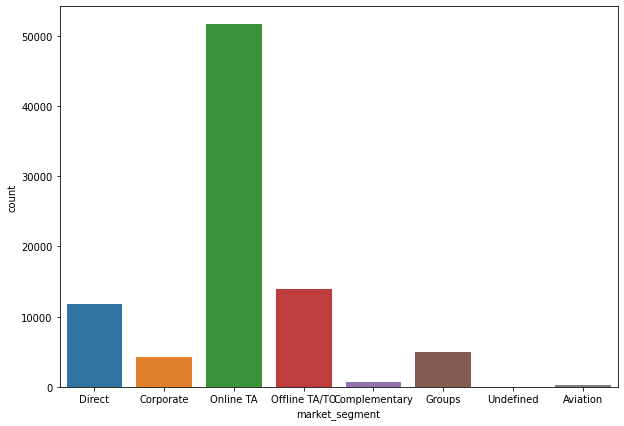

In [ ]:
#Frequency of Market Segment
plt.figure(figsize=(10,7))
sns.countplot(x='market_segment',data=hotel_data)

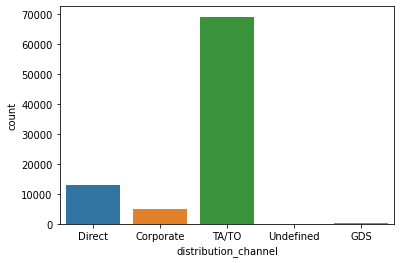

In [ ]:
#Frequency of distribtion channel
sns.countplot(x='distribution_channel',data=hotel_data)

#It is clear that most people tend to reach out to travel agencies (offline or online) to book their hotel tickets so targeting it for marketing and promotion can lead to increase in number of ticket booking

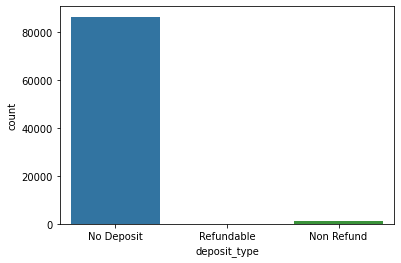

In [ ]:
#Frequecy of Deposit Type
sns.countplot(x='deposit_type',data=hotel_data)

#Majority of bookings are made without deposit which suggests the more cancelation rate.

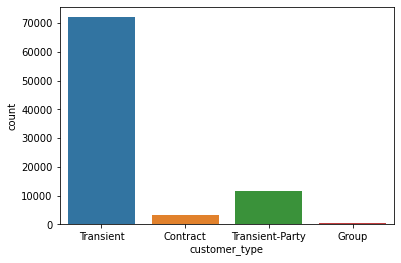

In [ ]:
#Frequency of customer_type
sns.countplot(x='customer_type',data=hotel_data)

#Transient type is highesht whiuch suggests that customers like to skip the middle agent.

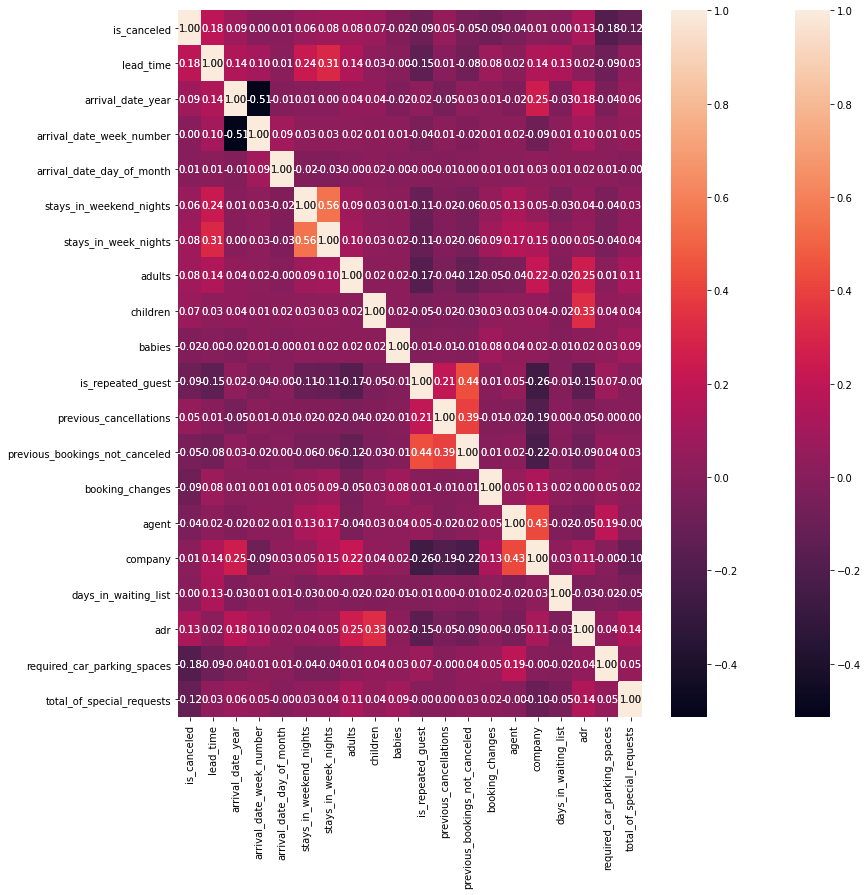

In [ ]:
#Coorelation Plot
plt.figure(figsize=(13,13))
sns.heatmap(hotel_data.corr(),annot=True,fmt='.2f')
fig = sns.heatmap(hotel_data.corr(),annot=True,fmt='.2f').get_figure()
fig.savefig("output.png")

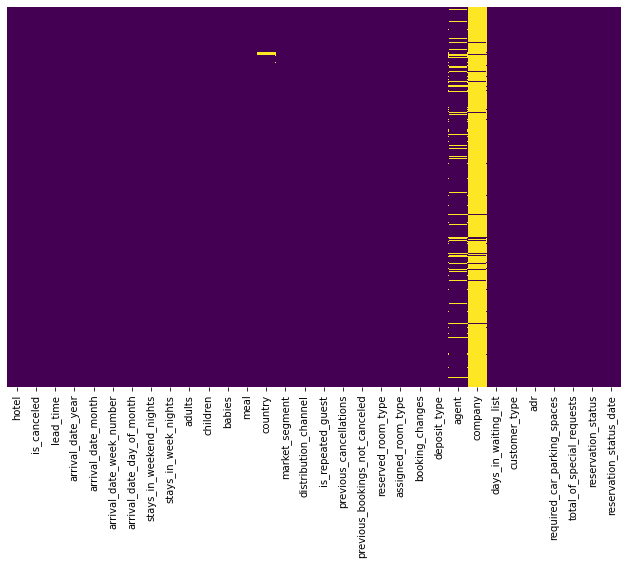

In [ ]:
#Data Cleaning
plt.figure(figsize=(11,7))
sns.heatmap(hotel_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
hotel_data.isnull().sum().sort_values(ascending=False)[:10]

company                     82137
agent                       12193
country                       452
children                        4
lead_time                       0
arrival_date_year               0
arrival_date_month              0
arrival_date_week_number        0
is_canceled                     0
market_segment                  0
dtype: int64

In [ ]:
hotel_data[['agent','company']] = hotel_data[['agent','company']].fillna(0.0)

In [ ]:
hotel_data['children'] = hotel_data['children'].fillna(hotel_data.children.mean())

In [ ]:
hotel_data['country'].fillna(hotel_data.country.mode().to_string(), inplace=True) #replacing na with most repeating one

In [ ]:
hotel_data = hotel_data.drop(hotel_data[(hotel_data.adults+hotel_data.babies+hotel_data.children)==0].index)

In [ ]:
hotel_data.isnull().sum().sort_values(ascending=False)[:10]

reservation_status_date      0
reservation_status           0
is_canceled                  0
lead_time                    0
arrival_date_year            0
arrival_date_month           0
arrival_date_week_number     0
arrival_date_day_of_month    0
stays_in_weekend_nights      0
stays_in_week_nights         0
dtype: int64

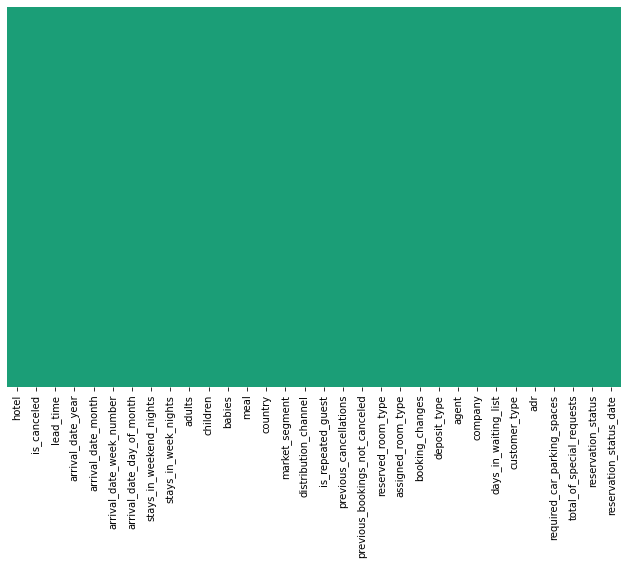

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(hotel_data.isnull(),yticklabels=False,cbar=False,cmap='Dark2')

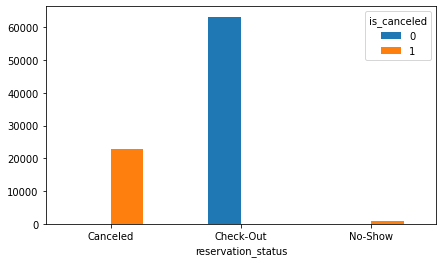

In [ ]:
#HighCorrelation
CrosstabResult=pd.crosstab(index=hotel_data['reservation_status'],columns=hotel_data['is_canceled'])
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

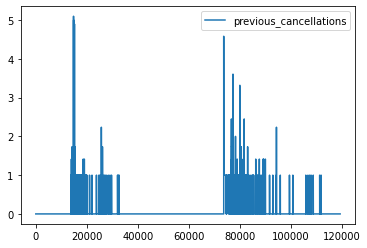

In [ ]:
#Variable was skewd earlier, sqrt function was used to remove the skewness
pc = pd.DataFrame()
pc['previous_cancellations'] = np.sqrt(hotel_data['previous_cancellations'])
pc.plot()

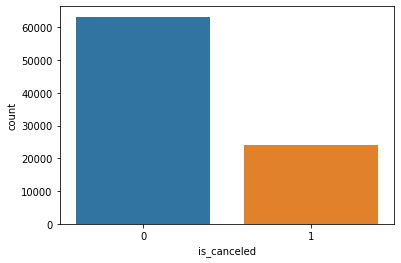

In [ ]:
#Class Imbalance
sns.countplot(x='is_canceled',data=hotel_data)

In [ ]:
#Splitting of Train and Test Data
hotel_train_val = hotel_data.sample(frac = 0.7)
hotel_test = hotel_data.drop(hotel_train_val.index)

In [ ]:
hotel_train_val.sort_values(['arrival_date_year','arrival_date_week_number'], ascending=True)

hotel  is_canceled  ...  reservation_status  reservation_status_date
14874   Resort Hotel            1  ...            Canceled               2015-03-17
14870   Resort Hotel            1  ...            Canceled               2015-03-09
23      Resort Hotel            0  ...           Check-Out               2015-07-07
44      Resort Hotel            0  ...           Check-Out               2015-07-09
15422   Resort Hotel            0  ...           Check-Out               2015-07-16
...              ...          ...  ...                 ...                      ...
73694     City Hotel            1  ...            Canceled               2017-07-26
13776   Resort Hotel            1  ...            Canceled               2017-08-08
118990    City Hotel            0  ...           Check-Out               2017-08-28
119375    City Hotel            0  ...           Check-Out               2017-09-04
39914   Resort Hotel            0  ...           Check-Out               2017-09-01

[61061 rows x 32 columns]

In [ ]:
#Dependent Variable
IsCanceled = hotel_train_val['is_canceled']
y = IsCanceled

In [ ]:
#Training Variable- Continous Variable
leadtime = hotel_train_val['lead_time']
arrivaldateyear = hotel_train_val['arrival_date_year']
arrivaldateweekno = hotel_train_val['arrival_date_week_number']
arrivaldatedayofmonth = hotel_train_val['arrival_date_day_of_month']
staysweekendnights = hotel_train_val['stays_in_weekend_nights']
staysweeknights = hotel_train_val['stays_in_week_nights']
adults = hotel_train_val['adults']
children = hotel_train_val['children']
babies = hotel_train_val['babies']
previouscancellations = hotel_train_val['previous_cancellations']
previousbookingsnotcanceled = hotel_train_val['previous_bookings_not_canceled']
bookingchanges = hotel_train_val['booking_changes']
dayswaitinglist = hotel_train_val['days_in_waiting_list']
adr = hotel_train_val['adr']
rcps = hotel_train_val['required_car_parking_spaces']
totalsqr = hotel_train_val['total_of_special_requests']

In [ ]:
#Training Variable- Categorical Variable
arrivaldatemonth = hotel_train_val.arrival_date_month.astype("category").cat.codes
arrivaldatemonthcat=pd.Series(arrivaldatemonth)
mealcat=hotel_train_val.meal.astype("category").cat.codes
mealcat=pd.Series(mealcat)
countrycat=hotel_train_val.country.astype("category").cat.codes
countrycat=pd.Series(countrycat)
marketsegmentcat=hotel_train_val.market_segment.astype("category").cat.codes
marketsegmentcat=pd.Series(marketsegmentcat)
distributionchannelcat=hotel_train_val.distribution_channel.astype("category").cat.codes
distributionchannelcat=pd.Series(distributionchannelcat)
reservedroomtypecat=hotel_train_val.reserved_room_type.astype("category").cat.codes
reservedroomtypecat=pd.Series(reservedroomtypecat)
assignedroomtypecat=hotel_train_val.assigned_room_type.astype("category").cat.codes
assignedroomtypecat=pd.Series(assignedroomtypecat)
deposittypecat=hotel_train_val.deposit_type.astype("category").cat.codes
deposittypecat=pd.Series(deposittypecat)
customertypecat=hotel_train_val.customer_type.astype("category").cat.codes
customertypecat=pd.Series(customertypecat)
reservationstatuscat=hotel_train_val.reservation_status.astype("category").cat.codes
reservationstatuscat=pd.Series(reservationstatuscat)
isrepeatedguestcat = hotel_train_val.is_repeated_guest.astype("category").cat.codes
isrepeatedguestcat=pd.Series(isrepeatedguestcat)
agentcat = hotel_train_val.agent.astype("category").cat.codes
agentcat=pd.Series(agentcat)
companycat = hotel_train_val.company.astype("category").cat.codes
companycat=pd.Series(companycat)

In [ ]:
#Training Data Stacked
x = np.column_stack((leadtime,arrivaldateyear,arrivaldatemonthcat,arrivaldateweekno,arrivaldatedayofmonth,staysweekendnights,staysweeknights,adults,children,babies,mealcat,countrycat,marketsegmentcat,distributionchannelcat,isrepeatedguestcat,previouscancellations,previousbookingsnotcanceled,reservedroomtypecat,assignedroomtypecat,bookingchanges,deposittypecat,dayswaitinglist,customertypecat,adr,rcps,totalsqr,reservationstatuscat))
x = sm.add_constant(x, prepend=True)

In [ ]:
#Features Selected
x1 = np.column_stack((leadtime, arrivaldateyear, staysweekendnights, staysweeknights, adults, children, babies, bookingchanges, dayswaitinglist, adr,
                      rcps, totalsqr, mealcat, countrycat, marketsegmentcat, distributionchannelcat, deposittypecat, customertypecat, 
                      isrepeatedguestcat, agentcat, companycat))
x1 = sm.add_constant(x1, prepend=True)

In [ ]:
#Trainning and Validation Data Splitting
x1_train, x1_val, y1_train, y1_val = train_test_split(x1, y, random_state=0)

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
classifier=xgb.XGBClassifier()

In [ ]:
#To find optimum paramters
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x1_train, y1_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 7}

In [ ]:
#XGB Model
xgb_model = xgb.XGBClassifier(base_score=0.7, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.01, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_model.fit(x1_train, y1_train)

print("Accuracy on training set: {:.3f}".format(xgb_model.score(x1_train, y1_train)))
print("Accuracy on validation set: {:.3f}".format(xgb_model.score(x1_val, y1_val)))

Accuracy on training set: 0.737
Accuracy on validation set: 0.712


In [ ]:
xgb_predict=xgb_model.predict(x1_val)
xgb_predict

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
print(confusion_matrix(y1_val,xgb_predict))
print(classification_report(y1_val,xgb_predict))

[[6932 4210]
 [ 185 3939]]
              precision    recall  f1-score   support

           0       0.97      0.62      0.76     11142
           1       0.48      0.96      0.64      4124

    accuracy                           0.71     15266
   macro avg       0.73      0.79      0.70     15266
weighted avg       0.84      0.71      0.73     15266



In [ ]:
hotel_test.sort_values(['arrival_date_year','arrival_date_week_number'], ascending=True)

hotel  is_canceled  ...  reservation_status  reservation_status_date
3       Resort Hotel            0  ...           Check-Out               2015-07-02
8       Resort Hotel            1  ...            Canceled               2015-05-06
13      Resort Hotel            0  ...           Check-Out               2015-07-05
16      Resort Hotel            0  ...           Check-Out               2015-07-05
20      Resort Hotel            0  ...           Check-Out               2015-07-06
...              ...          ...  ...                 ...                      ...
119377    City Hotel            0  ...           Check-Out               2017-09-04
119383    City Hotel            0  ...           Check-Out               2017-09-06
119384    City Hotel            0  ...           Check-Out               2017-09-06
119385    City Hotel            0  ...           Check-Out               2017-09-06
119387    City Hotel            0  ...           Check-Out               2017-09-07

[26169 rows x 32 columns]

In [ ]:
#Test Data - Continous Variable
t_leadtime = hotel_test['lead_time']
t_arrivaldateyear = hotel_test['arrival_date_year']
t_arrivaldateweekno = hotel_test['arrival_date_week_number']
t_arrivaldatedayofmonth = hotel_test['arrival_date_day_of_month']
t_staysweekendnights = hotel_test['stays_in_weekend_nights']
t_staysweeknights = hotel_test['stays_in_week_nights']
t_adults = hotel_test['adults']
t_children = hotel_test['children']
t_babies = hotel_test['babies']
t_previouscancellations = hotel_test['previous_cancellations']
t_previousbookingsnotcanceled = hotel_test['previous_bookings_not_canceled']
t_bookingchanges = hotel_test['booking_changes']
t_dayswaitinglist = hotel_test['days_in_waiting_list']
t_adr = hotel_test['adr']
t_rcps = hotel_test['required_car_parking_spaces']
t_totalsqr = hotel_test['total_of_special_requests']

In [ ]:
#Test Data - Categorical Variable
t_arrivaldatemonth = hotel_test.arrival_date_month.astype("category").cat.codes
t_arrivaldatemonthcat=pd.Series(t_arrivaldatemonth)
t_mealcat=hotel_test.meal.astype("category").cat.codes
t_mealcat=pd.Series(t_mealcat)
t_countrycat=hotel_test.country.astype("category").cat.codes
t_countrycat=pd.Series(t_countrycat)
t_marketsegmentcat=hotel_test.market_segment.astype("category").cat.codes
t_marketsegmentcat=pd.Series(t_marketsegmentcat)
t_distributionchannelcat=hotel_test.distribution_channel.astype("category").cat.codes
t_distributionchannelcat=pd.Series(t_distributionchannelcat)
t_reservedroomtypecat=hotel_test.reserved_room_type.astype("category").cat.codes
t_reservedroomtypecat=pd.Series(t_reservedroomtypecat)
t_assignedroomtypecat=hotel_test.assigned_room_type.astype("category").cat.codes
t_assignedroomtypecat=pd.Series(t_assignedroomtypecat)
t_deposittypecat=hotel_test.deposit_type.astype("category").cat.codes
t_deposittypecat=pd.Series(t_deposittypecat)
t_customertypecat=hotel_test.customer_type.astype("category").cat.codes
t_customertypecat=pd.Series(t_customertypecat)
t_reservationstatuscat=hotel_test.reservation_status.astype("category").cat.codes
t_reservationstatuscat=pd.Series(t_reservationstatuscat)
t_isrepeatedguestcat = hotel_test.is_repeated_guest.astype("category").cat.codes
t_isrepeatedguestcat=pd.Series(t_isrepeatedguestcat)
t_agentcat = hotel_test.agent.astype("category").cat.codes
t_agentcat=pd.Series(t_agentcat)
t_companycat = hotel_test.company.astype("category").cat.codes
t_companycat=pd.Series(t_companycat)

In [ ]:
#Stacked test variables
a = np.column_stack((t_leadtime, t_arrivaldateyear, t_staysweekendnights, t_staysweeknights, t_adults, t_children, t_babies, t_bookingchanges, 
                     t_dayswaitinglist, t_adr, t_rcps, t_totalsqr, t_mealcat, t_countrycat, t_marketsegmentcat, t_distributionchannelcat, t_deposittypecat, 
                     t_customertypecat, t_isrepeatedguestcat, t_agentcat, t_companycat))
a = sm.add_constant(a, prepend=True)
IsCanceled = hotel_test['is_canceled']
b = IsCanceled
b=b.values

In [ ]:
pred_test = xgb_model.predict(a)
pred_test

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
print(confusion_matrix(b,pred_test))
print(classification_report(b,pred_test))

[[13267  5535]
 [ 2032  5335]]
              precision    recall  f1-score   support

           0       0.87      0.71      0.78     18802
           1       0.49      0.72      0.59      7367

    accuracy                           0.71     26169
   macro avg       0.68      0.71      0.68     26169
weighted avg       0.76      0.71      0.72     26169

